In [1]:
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm

In [2]:
sa = pd.read_csv('../../data/sa340.csv')
culture = pd.read_csv('./results/culture/DNA_culture_clean_study.csv')

In [3]:
stopwords = pd.read_csv('./stopwords_culture.txt')
stopwords = stopwords['words'].tolist()


def get_food_feq(city=None):
    cu = culture.copy()
    if city != None:
         cu = cu[cu.city==city]

    cu = cu[~cu['DNA_culture'].str.contains('|'.join(stopwords))]
    cu = cu['DNA_culture'].tolist()
    cus = []
    for f in cu:
        cus += f.split(',')
    cts = Counter(cus)
    for st in stopwords:
        if st in cts:
            del cts[st]
    return cts

# 返回[昆曲, 黄梅戏, 京剧...]
def get_word_list_culture(city_name=None):
    df = culture.copy()
    if city_name:
        df = df[df['city']==city_name]
    
    df_filtered = df[~df['DNA_culture'].str.contains('|'.join(stopwords))]
    temp_list = df_filtered['DNA_culture'].tolist()
    cultures_arr = []
    for i in temp_list:
        cultures_arr += i.split(',')
    return cultures_arr

# 返回TOP K的词频
def get_word_count(word_list, num=20):
    word_counts = Counter(word_list)
    top_keywords = word_counts.most_common(num)
    return top_keywords

def single_color_func(word=None, font_size=None, position=None, orientation=None,
                      font_path=None, random_state=None, color=None):
    return color
    
def show_word_cloud(word_freq, type, color='#398A1D', size=(700, 100), max_font_size=100):
    def custom_color_func(word=None, font_size=None, position=None, orientation=None,
                          font_path=None, random_state=None):
        return single_color_func(word, font_size, position, orientation, font_path, random_state, color=color)
        
    wc = WordCloud(font_path="/System/Library/fonts/PingFang.ttc",
                   collocations=False,
                   background_color='#ffffff',
                   color_func=custom_color_func,
                   scale=4,
                   width=size[0],
                   height=size[1],
                   max_font_size = max_font_size,
                   random_state=2025,
                  ).generate_from_frequencies(word_freq)
    plt.imshow(wc)  
    plt.axis('off')
    plt.savefig('./results/culture/culture-' + type + '.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()

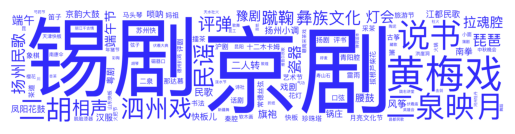

In [5]:
show_word_cloud(get_food_feq(), '全部', color='#312AFA', size=(520, 120))

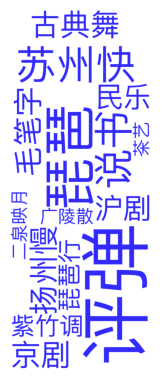

In [6]:
show_word_cloud(get_food_feq('苏州市'), '苏州市', color='#312AFA', size=(200, 520))